<center style="font-size: 26px"> <b>Проверка уровня знаний Python</b></center>

In [1]:
# обеспечиваем совместимость с Python 2 и 3
from __future__ import (absolute_import, division, print_function, unicode_literals)

# отключаем предупреждения дистрибутива Anaconda
import warnings
warnings.simplefilter('ignore')

**Описание датасета:**   
[Датасет вакансий с платформы HH.ru на Kaggle.com](https://www.kaggle.com/datasets/pavfedotov/heaadhunter-vacancies?resource=download&select=df2021-08-03.csv) 

Нужный файл - df2021-08-03.csv.

- *vacancy* - наименование вакансии
- *url* - ссылка на вакансию
- *created* - дата и время создания
- *has_test* - наличие тестового задания в вакансии
- *salary_from* - нижняя граница значения заработной платы
- *salary_to* - верхняя граница значения заработной платы
- *currency* - валюта заработной платы
- *experience* - требуемый опыт
- *schedule* - тип рабочего графика
- *skills* - требуемые навыки
- *employer* - наименование работодателя
- *area* - наименование города
- *description* - описание вакансии

#### Загрузите датасет

#### Подключим библиотеки для анализа данных

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import xml.etree.ElementTree as ET
import requests

#### И загрузим скаченный датасет

In [3]:
df = pd.read_csv('df2021-08-03.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   vacancy      1700 non-null   object 
 1   url          1700 non-null   object 
 2   created      1700 non-null   object 
 3   has_test     1700 non-null   bool   
 4   salary_from  538 non-null    float64
 5   salary_to    433 non-null    float64
 6   currency     613 non-null    object 
 7   experience   1700 non-null   object 
 8   schedule     1700 non-null   object 
 9   skills       1490 non-null   object 
 10  employer     1700 non-null   object 
 11  area         1700 non-null   object 
 12  description  1700 non-null   object 
dtypes: bool(1), float64(2), object(10)
memory usage: 161.2+ KB


### Практические задания:

### 1. Изучите методы для сбора данных курсов валют в [API Центрального банка Российской Федерации](https://www.cbr.ru/development/SXML/) . Используя запросы к API, приведите значения заработной платы к рублям одним из вариантов: 1) простой вариант - на текущую дату  2) вариант посложнее - на дату создания (created).

#### Выполню вариант посложнее, для него нужно превратить объект в дату

In [4]:
df.created = pd.to_datetime(df.created)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype                    
---  ------       --------------  -----                    
 0   vacancy      1700 non-null   object                   
 1   url          1700 non-null   object                   
 2   created      1700 non-null   datetime64[ns, UTC+03:00]
 3   has_test     1700 non-null   bool                     
 4   salary_from  538 non-null    float64                  
 5   salary_to    433 non-null    float64                  
 6   currency     613 non-null    object                   
 7   experience   1700 non-null   object                   
 8   schedule     1700 non-null   object                   
 9   skills       1490 non-null   object                   
 10  employer     1700 non-null   object                   
 11  area         1700 non-null   object                   
 12  description  1700 non-null   object             

#### Для теста получу несколько вакансий, имеющие зарплату в Евро

In [5]:
df[df['currency'] == 'EUR'].head()

,vacancy,url,created,has_test,salary_from,salary_to,currency,experience,schedule,skills,employer,area,description
19,Python Software Engineer,https://hh.ru/applicant/vacancy_response?vacan...,2021-07-07 20:12:42+03:00,False,3400.0,NaN,EUR,От 1 года до 3 лет,Полный день,Python;PostgreSQL;SQL;Linux;Docker;asyncio;,Exness,Москва,"Кто мы? Мы финтех компания, разрабатывающая B2..."
123,Senior Python Back-end Developer (Remote),https://hh.ru/applicant/vacancy_response?vacan...,2021-07-30 17:20:15+03:00,False,NaN,3500.0,EUR,Нет опыта,Удаленная работа,Python;MySQL;Redis;MongoDB;asyncio;aiohttp;k8s;,AppFollow,Санкт-Петербург,AppFollow - это платформа для мониторинга прил...
145,Senior Python Back-end Developer (Remote),https://hh.ru/applicant/vacancy_response?vacan...,2021-07-30 17:20:15+03:00,False,NaN,3500.0,EUR,Нет опыта,Удаленная работа,Python;MySQL;Redis;MongoDB;asyncio;aiohttp;k8s;,AppFollow,Москва,AppFollow - это платформа для мониторинга прил...
427,Python Developer,https://hh.ru/applicant/vacancy_response?vacan...,2021-07-31 16:11:46+03:00,False,2000.0,NaN,EUR,От 1 года до 3 лет,Гибкий график,Python;Software Development;,OpenWeather,Москва,"We are OpenWeather: high-growth, energetic and..."
437,Senior Python Developer (удаленно),https://hh.ru/applicant/vacancy_response?vacan...,2021-08-02 15:34:31+03:00,False,2500.0,4000.0,EUR,От 3 до 6 лет,Удаленная работа,Python;,Кадровое агентство Алексея Сухорукова,Новосибирск,"Крупная компания, разрабатывающая уникальную м..."


#### Далее напишу функцию, которая в случае нахождения иностранной валюты конвертирует ее в рубли, и применю ее ко всему датафрейму

In [6]:
# http://www.cbr.ru/scripts/XML_daily.asp?date_req=02/03/2002
def currency_change(series):
    if series.currency not in [np.nan, 'RUR']:
        formatted_date = series.created.strftime('%d/%m/%Y')
        url = f'http://www.cbr.ru/scripts/XML_daily.asp?date_req={formatted_date}'
        response = requests.get(url)
        root = ET.fromstring(response.content)

        for valute in root.findall('Valute'):
            char_code = valute.find('CharCode').text
            if series.currency == char_code:
                if not np.isnan(series.salary_from):
                    series.salary_from = series.salary_from * float(valute.find('Value').text.replace(',', '.'))
                if not np.isnan(series.salary_to):
                    series.salary_to = series.salary_to * float(valute.find('Value').text.replace(',', '.'))
        series.currency = 'RUR'
    return series

In [7]:
df = df.apply(currency_change, axis=1)
df.head()

,vacancy,url,created,has_test,salary_from,salary_to,currency,experience,schedule,skills,employer,area,description
0,Backend/Full-stack developer (python),https://hh.ru/applicant/vacancy_response?vacan...,2021-08-01 13:02:48+03:00,False,120000.0,NaN,RUR,От 1 года до 3 лет,Гибкий график,Python;PostgreSQL;Linux;Flask;,ATI.SU,Санкт-Петербург,Привет! Мы ATI.SU ― крупнейшая в России компан...
1,Бэкенд-разработчик (Python) / Middle Python / ...,https://hh.ru/applicant/vacancy_response?vacan...,2021-07-09 08:13:01+03:00,False,150000.0,220000.0,RUR,От 3 до 6 лет,Удаленная работа,Python;Git;MongoDB;Redis;Design Patterns;Flask;,"ЮТэйр, Авиакомпания",Киров (Кировская область),Utair - российская авиакомпания. Мы летаем по ...
2,Fullstack Middle Python (Django) / VueJS Dev,https://hh.ru/applicant/vacancy_response?vacan...,2021-07-21 15:24:16+03:00,False,NaN,NaN,NaN,От 1 года до 3 лет,Полный день,Python;Git;Django Framework;PostgreSQL;Linux;V...,КРОК,Москва,"В команду, которая занимается разработкой инст..."
3,Python Developer,https://hh.ru/applicant/vacancy_response?vacan...,2021-07-28 12:57:57+03:00,False,NaN,NaN,NaN,От 3 до 6 лет,Удаленная работа,Python;Django Framework;CSS;,Mad Devs,Краснодар,Mad Devs - full stack команда для разработки и...
4,QA Automation (Python),https://hh.ru/applicant/vacancy_response?vacan...,2021-07-31 17:10:49+03:00,False,NaN,NaN,NaN,От 1 года до 3 лет,Удаленная работа,Python;Pytest;Ansible;Selenium;,Аренадата Софтвер,Москва,"Arenadata — динамично развивающаяся компания, ..."


#### Проверим значение, которое до этого было в евро

In [8]:
df.iloc[437]

vacancy                       Senior Python Developer (удаленно)
url            https://hh.ru/applicant/vacancy_response?vacan...
created                                2021-08-02 15:34:31+03:00
has_test                                                   False
salary_from                                            217478.25
salary_to                                               347965.2
currency                                                     RUR
experience                                         От 3 до 6 лет
schedule                                        Удаленная работа
skills                                                   Python;
employer                   Кадровое агентство Алексея Сухорукова
area                                                 Новосибирск
description    Крупная компания, разрабатывающая уникальную м...
Name: 437, dtype: object

### 2. Найдите вакансию с самой высокой заработной платой, где подойдет 4 года опыта работы и не нужно проходить тестовое задание.

#### Проверю какие есть значения для колонки experience и для колонки has_test

In [9]:
print(df.experience.unique())
print(df.has_test.unique())

['От 1 года до 3 лет' 'От 3 до 6 лет' 'Нет опыта' 'Более 6 лет']
[False  True]


#### Под условие не подходят варианты **'Более 6 лет'** для колонки *experience* и **True** для колонки *has_test*

#### Формулировка задания расплывчата, поэтому реализую несколько вариантов решения задачи:
#### ***Первый способ***: Будем считать зарплатой начальное значение на вакансии 
#### (В учет не идут строки без начального значения зп)

In [10]:
df[(df.experience != 'Более 6 лет') & 
    (df.has_test == False) & 
    ~(pd.isnull(df.salary_from))].sort_values(by='salary_from', ascending=False).head(1)

,vacancy,url,created,has_test,salary_from,salary_to,currency,experience,schedule,skills,employer,area,description
565,Senior C++/Python Developer (Yellow Team),https://hh.ru/applicant/vacancy_response?vacan...,2021-07-29 19:01:14+03:00,False,350000.0,NaN,RUR,От 3 до 6 лет,Полный день,NaN,Semrush,Санкт-Петербург,Semrush – продуктовая IT-компания. С 2008 года...


#### ***Второй способ***: Будем считать зарплатой максимальное значение на вакансии
#### (В учет не идут строки без максимального значения зп)

In [11]:
df[(df.experience != 'Более 6 лет') & 
    (df.has_test == False) & 
    ~(pd.isnull(df.salary_to))].sort_values(by='salary_to', ascending=False).head(1)

,vacancy,url,created,has_test,salary_from,salary_to,currency,experience,schedule,skills,employer,area,description
959,Back-end Developer (Python3),https://hh.ru/applicant/vacancy_response?vacan...,2021-08-02 13:21:00+03:00,False,320000.0,550000.0,RUR,От 1 года до 3 лет,Гибкий график,Git;Linux;Python;PostgreSQL;Django Framework;R...,Фортин,Москва,Что для нас важно: Опыт разработки на Python3...


#### ***Третий способ***: Будем считать зарплатой среднее значение на вакансии
#### (В учет не идут строки, не имеющие начальной и конечной зп)

In [12]:
mean_salary_df = df[(df.experience != 'Более 6 лет') & 
    (df.has_test == False) & 
    ~(pd.isnull(df.salary_to)) & 
    ~(pd.isnull(df.salary_from))]
mean_salary_df['mean_salary'] = (mean_salary_df.salary_from + mean_salary_df.salary_to) / 2
mean_salary_df.sort_values(by='mean_salary', ascending=False).head(1)

,vacancy,url,created,has_test,salary_from,salary_to,currency,experience,schedule,skills,employer,area,description,mean_salary
959,Back-end Developer (Python3),https://hh.ru/applicant/vacancy_response?vacan...,2021-08-02 13:21:00+03:00,False,320000.0,550000.0,RUR,От 1 года до 3 лет,Гибкий график,Git;Linux;Python;PostgreSQL;Django Framework;R...,Фортин,Москва,Что для нас важно: Опыт разработки на Python3...,435000.0


#### 3. Сделайте рейтинг (топ-30) навыков по всем вакансиям.

#### Формулировка опять же расплывчата, поэтому реализую несколько вариантов решения

#### ***Первый способ***: Топ-30 навыков по популярности
#### Напишем функцию для подсчета частоты появления навыков

In [13]:
skills_dict = dict()
def count_skills(series):
    global skills_dict
    if not pd.isnull(series):
        skills_array = series.split(';')
        for skill in skills_array:
            if skill:
                if skill in skills_dict.keys():
                    skills_dict[skill] += 1
                else:
                    skills_dict[skill] = 1
df.skills.apply(count_skills);

#### Переведем в серию и выведем искомые топ-30 навыков

In [14]:
skills_df = pd.Series(skills_dict)
top_skills = skills_df.sort_values(ascending=False).head(30)
top_skills

Python              1442
Git                  586
SQL                  501
PostgreSQL           499
Django Framework     467
Linux                463
Flask                177
Docker               172
JavaScript           149
Английский язык      141
MySQL                128
ООП                  120
MongoDB              113
Redis                107
REST                  70
RabbitMQ              68
Django                62
CSS                   56
HTML                  56
Atlassian Jira        52
C++                   50
API                   49
Java                  43
MS SQL                43
Базы данных           41
Работа в команде      39
AWS                   36
Pytest                35
Celery                35
aiohttp               33
dtype: int64

#### Визуализируем значения

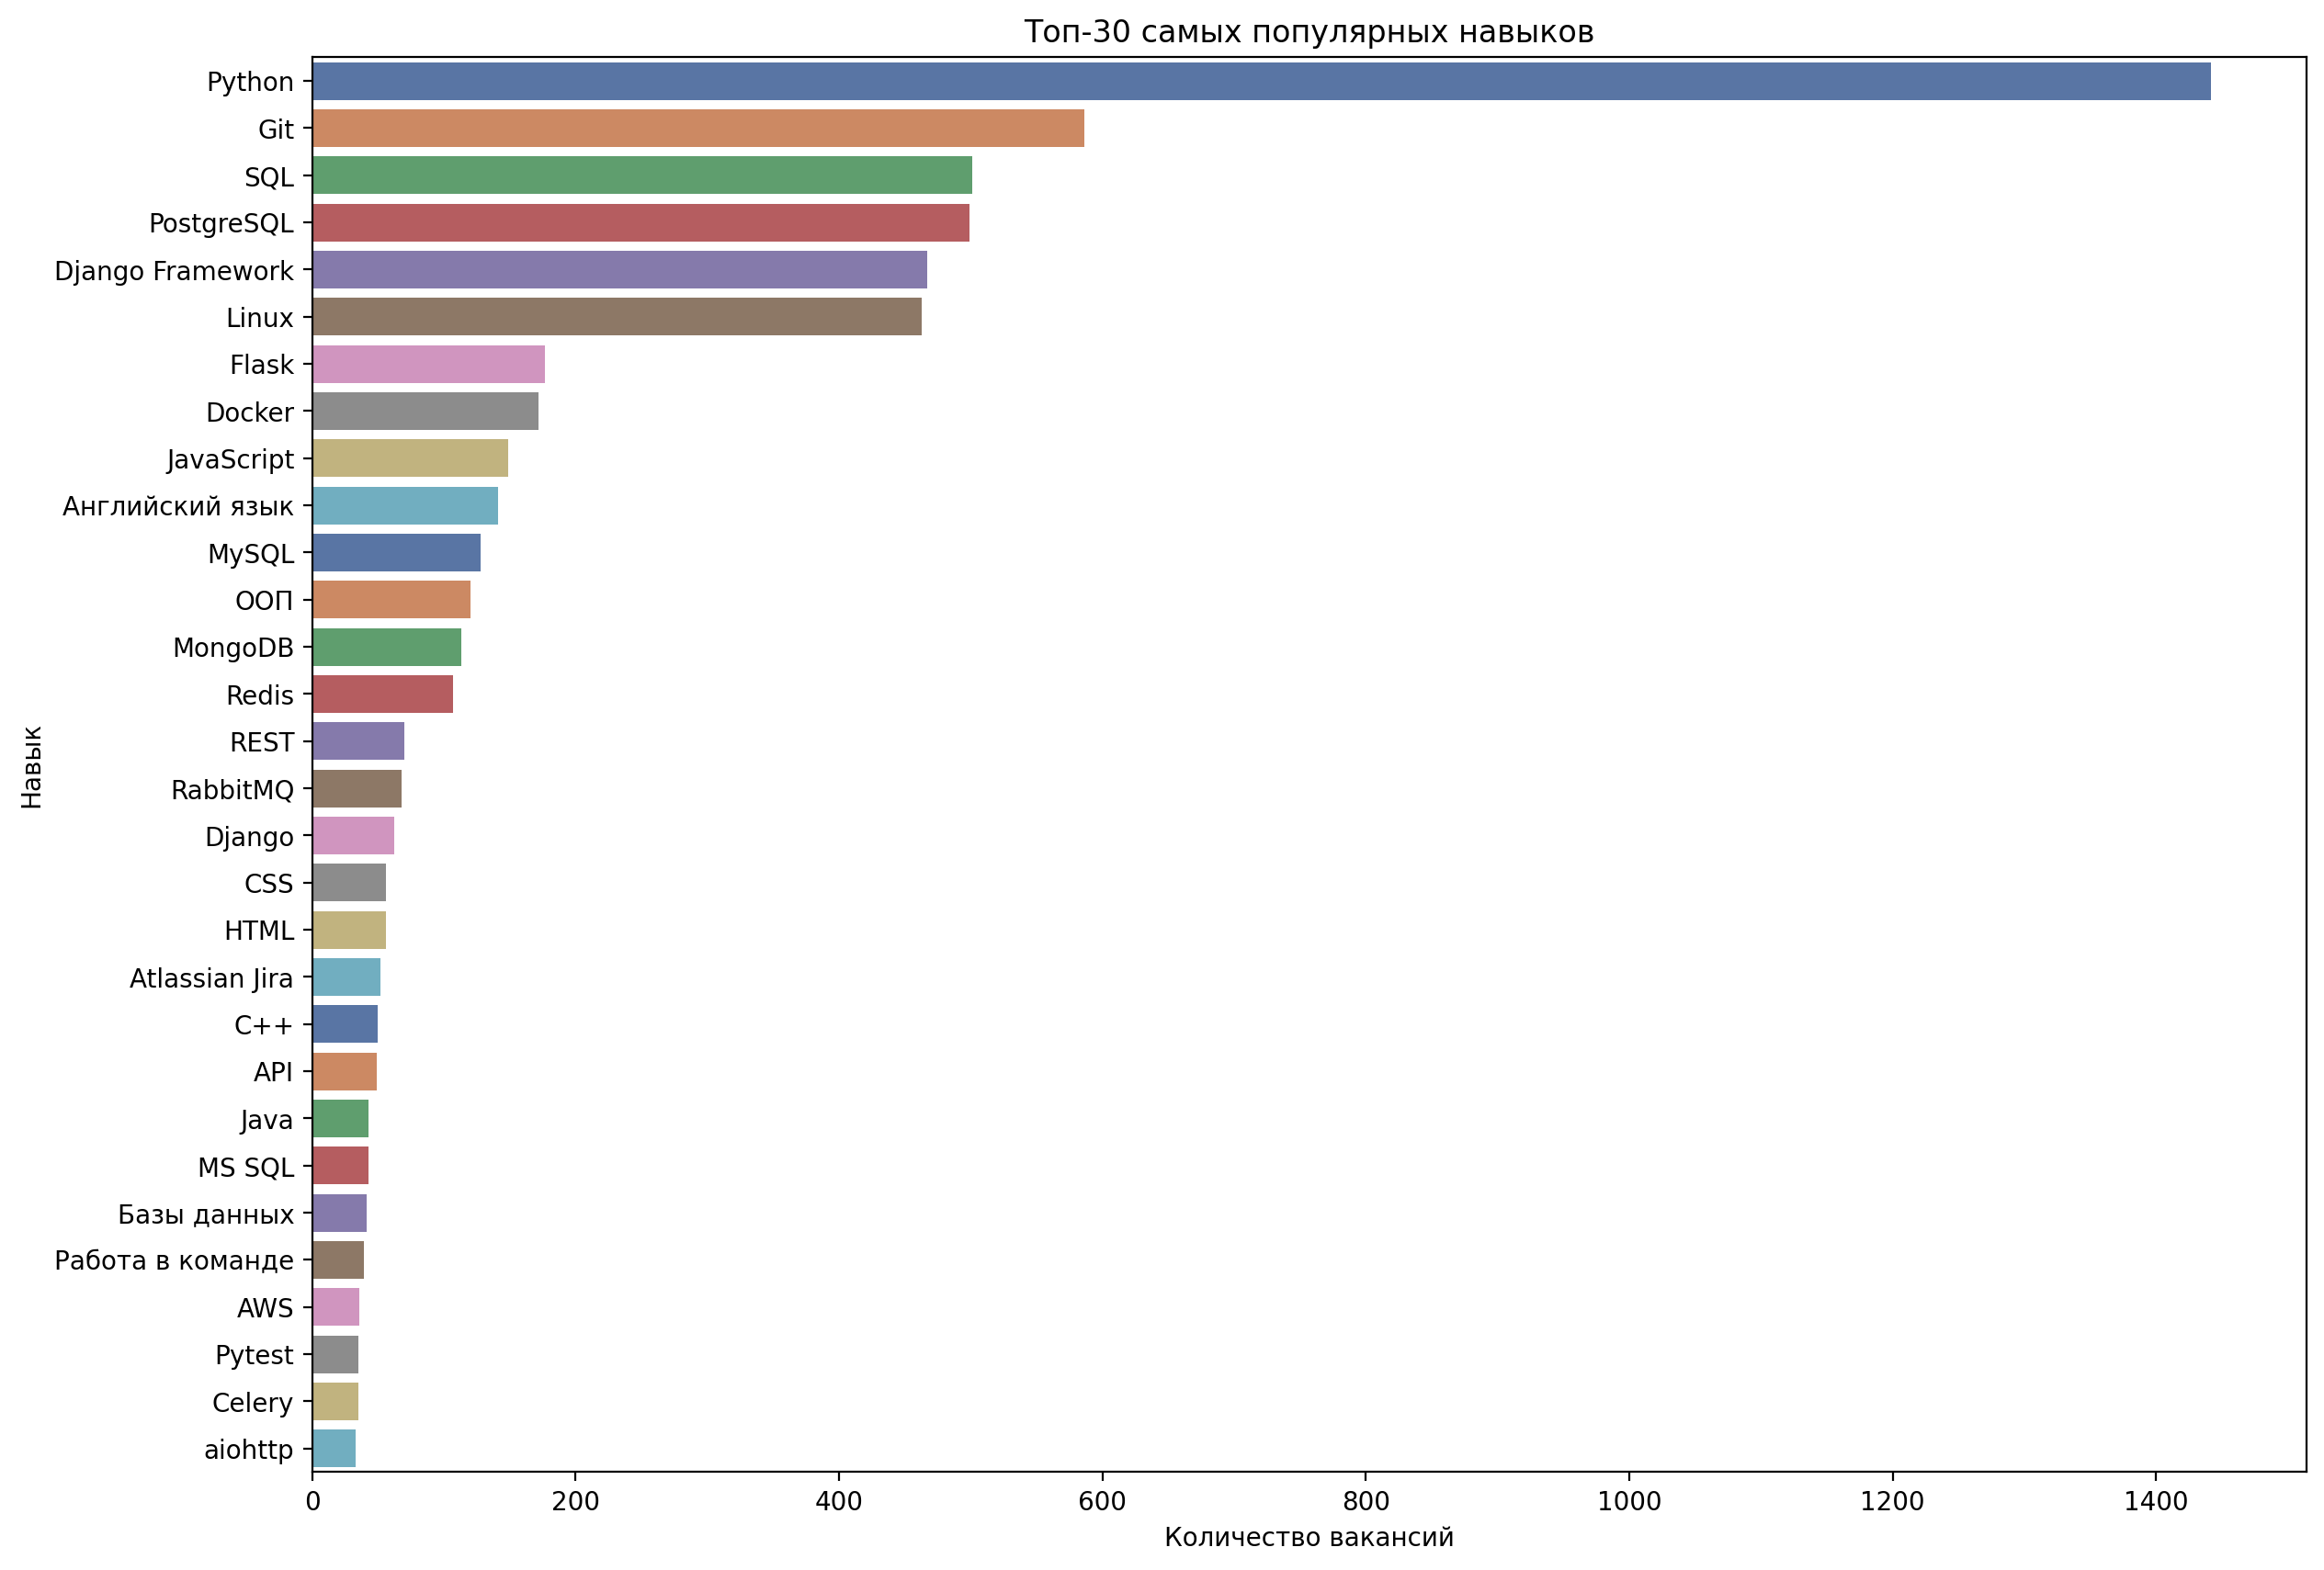

In [15]:
plt.figure(figsize=(14, 10), dpi=200)
plt.title('Топ-30 самых популярных навыков')
plt.xlabel('Количество вакансий')
plt.ylabel('Навык')
sns.barplot(y=top_skills.index, x=top_skills, palette='deep');

#### ****Второй способ****: Топ-30 навыков по осредненной оплате
#### Для этого создам таблицу из нужных колонок и пойду на условность, что если указана только верхняя или только нижняя зарплата, то именно ее мы и будем получать

In [16]:
sal_skill_df = df[['salary_from', 'salary_to', 'skills']]
sal_skill_df['salary_from'].fillna(sal_skill_df['salary_to'], inplace=True)
sal_skill_df['salary_to'].fillna(sal_skill_df['salary_from'], inplace=True)
sal_skill_df = sal_skill_df.dropna()
sal_skill_df

,salary_from,salary_to,skills
0,120000.0,120000.0,Python;PostgreSQL;Linux;Flask;
1,150000.0,220000.0,Python;Git;MongoDB;Redis;Design Patterns;Flask;
7,200000.0,350000.0,Python;Node.js;HTTP;Git;TCP/IP;JavaScript;PHP;...
8,90000.0,180000.0,Python;MySQL;Базы данных;SQL;Linux;Django Fram...
10,130000.0,200000.0,Python;Git;Redis;MongoDB;JavaScript;
...,...,...,...
1674,150000.0,220000.0,Python;Git;MongoDB;Redis;Design Patterns;Flask;
1675,250000.0,250000.0,SQL;Python;Node.js;СУБД;Android;iOS;NoSQL;UX;G...
1677,250000.0,250000.0,SQL;Python;Node.js;СУБД;Android;iOS;NoSQL;UX;G...
1679,250000.0,250000.0,SQL;Python;Node.js;СУБД;Android;iOS;NoSQL;UX;G...


#### Далее добавлю колонку для подсчета среднего значения зарплаты и удалю изначальные колонки с зарплатами

In [17]:
sal_skill_df['mean_salary'] = (sal_skill_df['salary_from'] + sal_skill_df['salary_to']) / 2
sal_skill_df.drop(columns=['salary_from', 'salary_to'], inplace=True)
sal_skill_df

,skills,mean_salary
0,Python;PostgreSQL;Linux;Flask;,120000.0
1,Python;Git;MongoDB;Redis;Design Patterns;Flask;,185000.0
7,Python;Node.js;HTTP;Git;TCP/IP;JavaScript;PHP;...,275000.0
8,Python;MySQL;Базы данных;SQL;Linux;Django Fram...,135000.0
10,Python;Git;Redis;MongoDB;JavaScript;,165000.0
...,...,...
1674,Python;Git;MongoDB;Redis;Design Patterns;Flask;,185000.0
1675,SQL;Python;Node.js;СУБД;Android;iOS;NoSQL;UX;G...,250000.0
1677,SQL;Python;Node.js;СУБД;Android;iOS;NoSQL;UX;G...,250000.0
1679,SQL;Python;Node.js;СУБД;Android;iOS;NoSQL;UX;G...,250000.0


#### Напишем функцию для генерации датафрейма со всеми средними зарплатами

In [18]:
skills_dict = dict()
def salary_skills(series):
    global skills_dict
    skills_array = series.skills.split(';')
    for skill in skills_array:
        if skill:
            if skill in skills_dict.keys():
                skills_dict[skill].append(series.mean_salary)
            else:
                skills_dict[skill] = [series.mean_salary]
sal_skill_df.apply(salary_skills, axis=1);

#### Переведем полученные значения в датафрейм, найдем 30 самых высоко оплачиваемых профессий по средним значениям зарплаты на вакансии

In [19]:
sal_skill_df = pd.DataFrame.from_dict(skills_dict, orient='index')
sal_skill_df = sal_skill_df.T
top_30_skills = sal_skill_df[sal_skill_df.mean().sort_values(ascending=False).head(30).index]
top_30_skills.columns

Index(['Apache Spark', 'code-review', 'RESTful', 'Flutter', 'Cloud',
       'Креативность', 'golang', 'k8s', 'Docker swarm', 'Маркетплейсы',
       'Умение организовать работу', 'E-Commerce', 'Highload', 'CircleCI',
       'руководство командой разработчиков', 'Машинное обучение',
       'Libvirt Python SDK', 'Gunicorn', 'Мотивация персонала',
       'Amazon Web Services', 'Управление проектами', 'ML',
       'Работа с большим объемом информации',
       'Английский — B2 — Средне-продвинутый', 'Apollo', 'Snowflake',
       'AirFlow', 'CI/DI', 'Микросервисы', 'FastApi'],
      dtype='object')

#### Визуализируем значения с помощью  графика **boxplot**, чтобы посмотреть на медиану и вариативность в данных

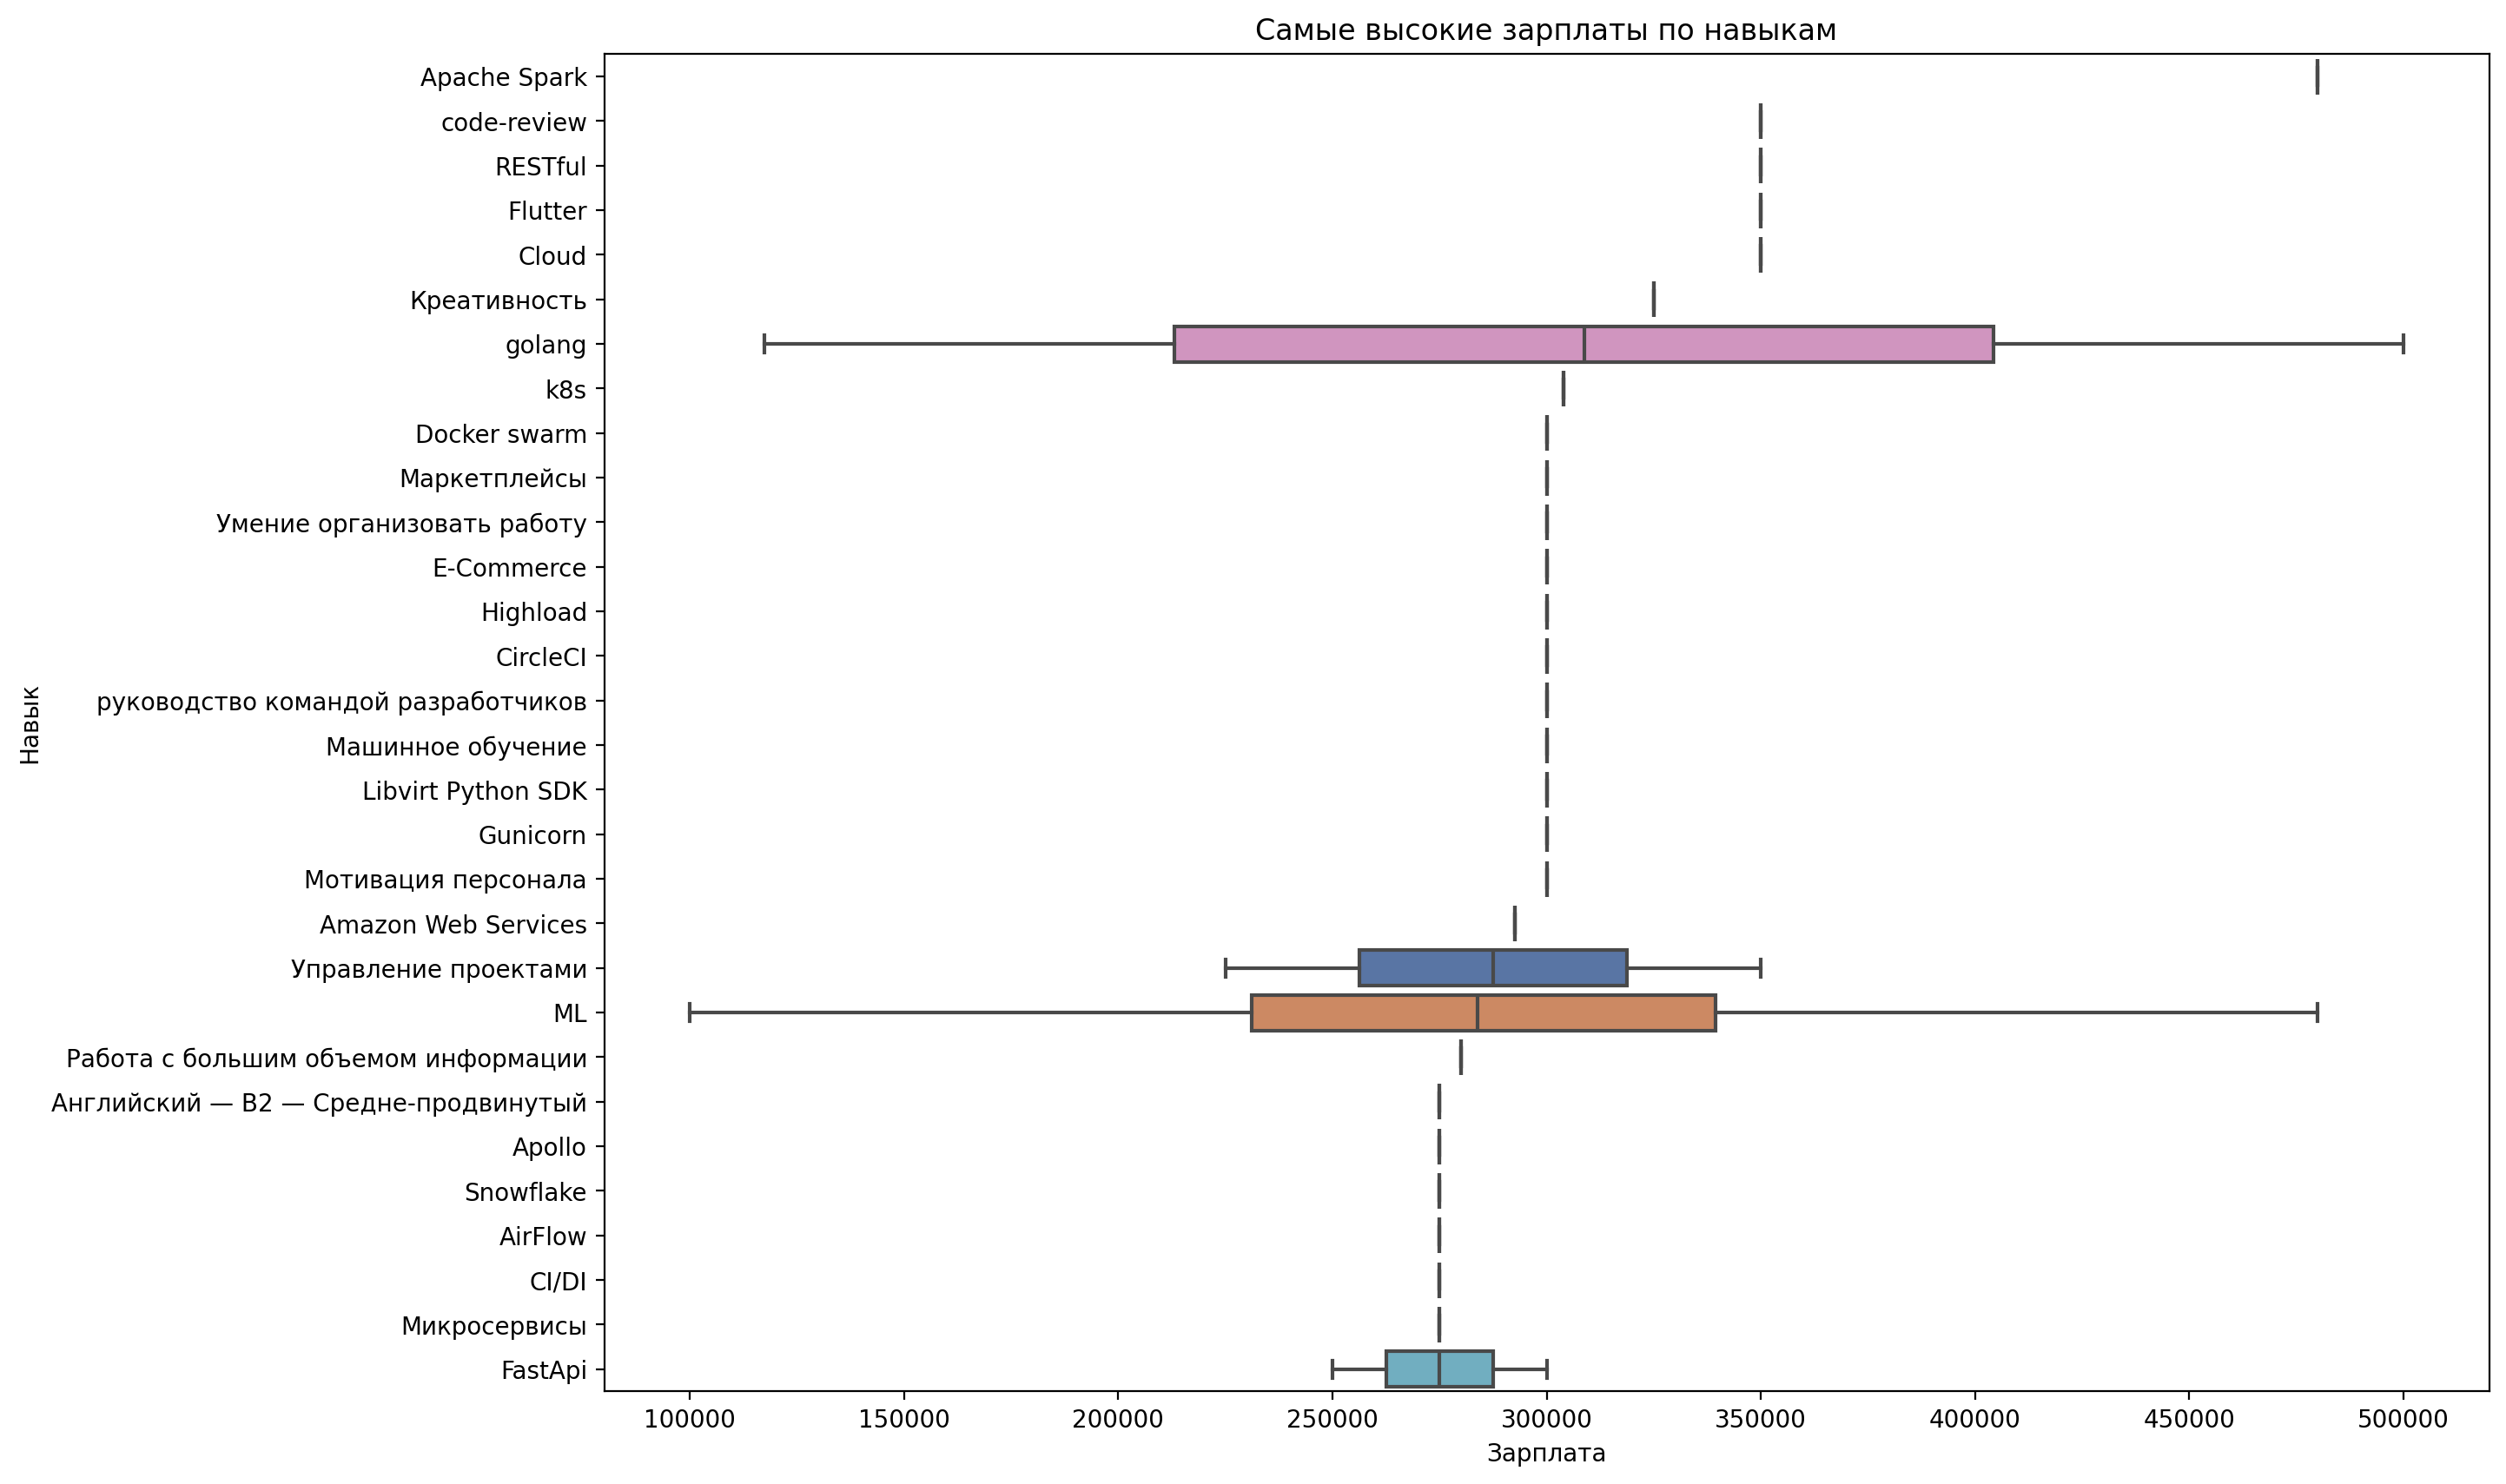

In [20]:
plt.figure(figsize=(14, 10), dpi=200)
sns.boxplot(top_30_skills, orient='h', palette='deep')
plt.xlabel('Зарплата')
plt.ylabel('Навык')
plt.title('Самые высокие зарплаты по навыкам');

#### По графику видно, что эти значения слабо описывают истинные средние зарплаты из-за того, что с данными навыками слишком мало вакансий.
#### По ЦПТ распределение средних будет стремиться к нормальному, а следовательно будет более информативными, при значениях более 30, поэтому повторим прошлые действия, добавив нижнее ограничение на количество наблюдений.

In [21]:
sal_skill_df = pd.DataFrame.from_dict(skills_dict, orient='index')
sal_skill_df = sal_skill_df.T
enought_count_skills = sal_skill_df.T[(sal_skill_df.count() > 29)].T
top_30_skills = enought_count_skills[enought_count_skills.mean().sort_values(ascending=False).head(30).index]
print(f'Найдено всего {top_30_skills.columns.size} навыков, имеющих более 30 вакансий с зарплатой')
print(*top_30_skills.columns, sep='\n')

Найдено всего 17 навыков, имеющих более 30 вакансий с зарплатой
REST
MongoDB
Redis
MySQL
PostgreSQL
RabbitMQ
Английский язык
Docker
Django Framework
Linux
Django
Python
Git
JavaScript
SQL
Flask
ООП


#### Количество навыков менее 30 можно объяснить тем, что малое количество работадателей указывают зарплату, ожидая прощупование вилки на собеседовании.
#### Убедимся в этом, посмотрев информацию об изначальном датафрейме

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype                    
---  ------       --------------  -----                    
 0   vacancy      1700 non-null   object                   
 1   url          1700 non-null   object                   
 2   created      1700 non-null   datetime64[ns, UTC+03:00]
 3   has_test     1700 non-null   bool                     
 4   salary_from  538 non-null    float64                  
 5   salary_to    433 non-null    float64                  
 6   currency     613 non-null    object                   
 7   experience   1700 non-null   object                   
 8   schedule     1700 non-null   object                   
 9   skills       1490 non-null   object                   
 10  employer     1700 non-null   object                   
 11  area         1700 non-null   object                   
 12  description  1700 non-null   object             

#### Визуализируем результат

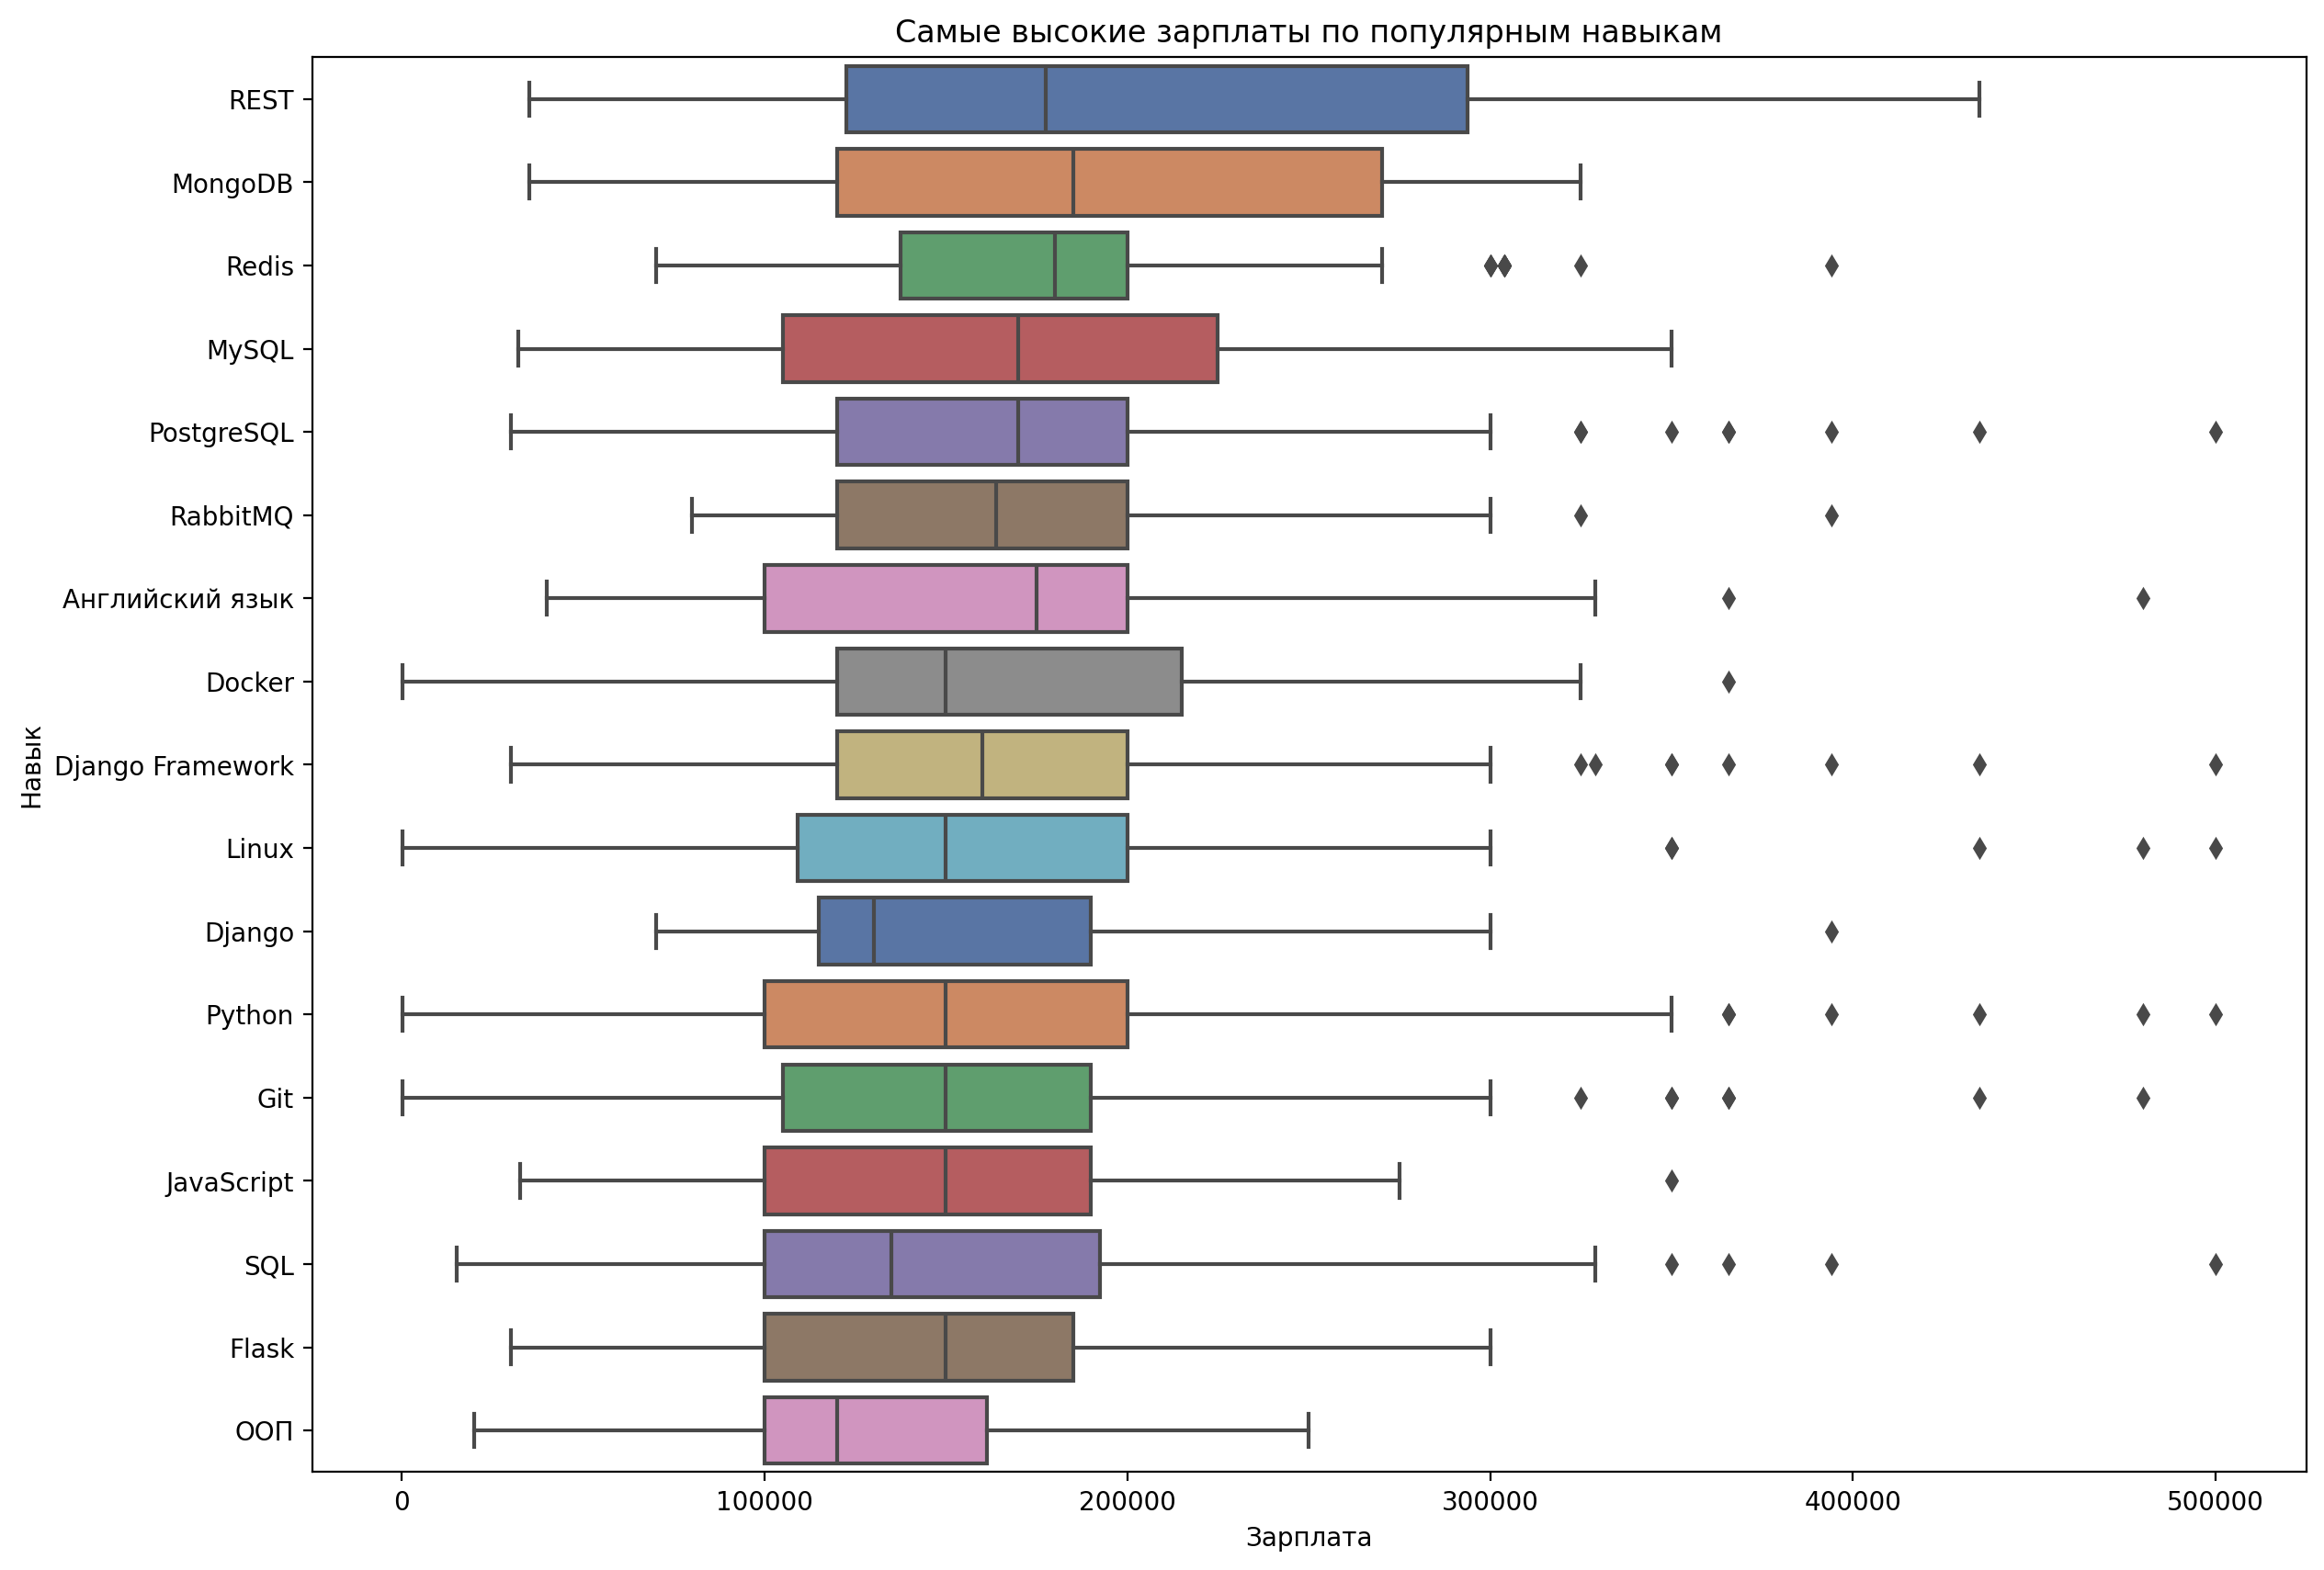

In [23]:
plt.figure(figsize=(14, 10), dpi=200)
sns.boxplot(top_30_skills, orient='h', palette='deep')
plt.xlabel('Зарплата')
plt.ylabel('Навык')
plt.title('Самые высокие зарплаты по популярным навыкам');

#### 4. Cоставьте топ-10 городов с наибольшей средней заработной платой по вакансиям тестировщика (QA).

#### Найдем вакансии, имеющие в описании или в названии 'QA'

In [24]:
qa_vacancies = df[(df['description'].str.contains('QA')) | (df['vacancy'].str.contains('QA'))]
qa_vacancies.head()

,vacancy,url,created,has_test,salary_from,salary_to,currency,experience,schedule,skills,employer,area,description
4,QA Automation (Python),https://hh.ru/applicant/vacancy_response?vacan...,2021-07-31 17:10:49+03:00,False,NaN,NaN,NaN,От 1 года до 3 лет,Удаленная работа,Python;Pytest;Ansible;Selenium;,Аренадата Софтвер,Москва,"Arenadata — динамично развивающаяся компания, ..."
10,Middle Python developer (Москва),https://hh.ru/applicant/vacancy_response?vacan...,2021-08-01 10:08:37+03:00,False,130000.0,200000.0,RUR,От 3 до 6 лет,Полный день,Python;Git;Redis;MongoDB;JavaScript;,Тагес Джамп,Москва,​​​​​​ TagesJump работает на рынке IT с 2012 г...
20,Python Test Developer,https://hh.ru/applicant/vacancy_response?vacan...,2021-08-01 10:55:57+03:00,False,NaN,NaN,NaN,От 3 до 6 лет,Полный день,NaN,Electrolux,Санкт-Петербург,ELECTROLUX PRESENTS For us going to work every...
21,Senior QA Automation Engineer (Python),https://hh.ru/applicant/vacancy_response?vacan...,2021-08-02 18:55:42+03:00,False,NaN,NaN,NaN,От 1 года до 3 лет,Полный день,Atlassian Jira;Python;Английский язык;Jenkins;...,"Dell Technologies, Центр Разработок",Санкт-Петербург,Welcome to the cutting edge of Enterprise Soft...
27,QA automation engineer (JS/Python),https://hh.ru/applicant/vacancy_response?vacan...,2021-07-15 11:30:46+03:00,False,NaN,NaN,NaN,От 3 до 6 лет,Удаленная работа,Python;Git;Английский язык;Jenkins;JavaScript;...,Аквелон,Казань,"Привет, наш будущий сотрудник и давай знакомит..."


#### Посмотрим на города, ищущие тестировщиков

In [25]:
qa_vacancies.area.unique()

array(['Москва', 'Санкт-Петербург', 'Казань', 'Новосибирск', 'Ижевск',
       'Уфа', 'Нижний Новгород', 'Саратов', 'Омск', 'Калининград',
       'Самара', 'Тамбов', 'Екатеринбург', 'Челябинск', 'Йошкар-Ола'],
      dtype=object)

#### По аналогии с прошлым заданием в случаях, когда указана только одна из границ, будем считать, что эта граница и будет итоговой зарплатой

In [26]:
qa_vacancies = qa_vacancies[['salary_from', 'salary_to', 'area']]
qa_vacancies['salary_from'].fillna(qa_vacancies['salary_to'], inplace=True)
qa_vacancies['salary_to'].fillna(qa_vacancies['salary_from'], inplace=True)
# qa_vacancies = qa_vacancies.dropna()
qa_vacancies

,salary_from,salary_to,area
4,NaN,NaN,Москва
10,130000.0,200000.0,Москва
20,NaN,NaN,Санкт-Петербург
21,NaN,NaN,Санкт-Петербург
27,NaN,NaN,Казань
...,...,...,...
1628,NaN,NaN,Москва
1649,NaN,NaN,Санкт-Петербург
1663,NaN,NaN,Москва
1669,NaN,NaN,Москва


#### Будем считать за зарплату среднее значение между начальной и максимальной зарплатой в вакансии. Сгруппирую значения по городам и найду среднее для каждого города. В итоге получу искомые города

In [27]:
qa_vacancies['mean_salary'] = (qa_vacancies['salary_from'] + qa_vacancies['salary_to']) / 2
qa_vacancies.drop(columns=['salary_from', 'salary_to'], inplace=True)
qa_vacancies = qa_vacancies.groupby('area').agg('mean').sort_values('mean_salary', ascending=False).round().head(10)
qa_vacancies

,mean_salary
area,
Тамбов,200000.0
Москва,193538.0
Санкт-Петербург,189615.0
Нижний Новгород,180000.0
Казань,90000.0
Уфа,80000.0
Йошкар-Ола,60000.0
Екатеринбург,NaN
Ижевск,NaN


#### Визуализирую результат

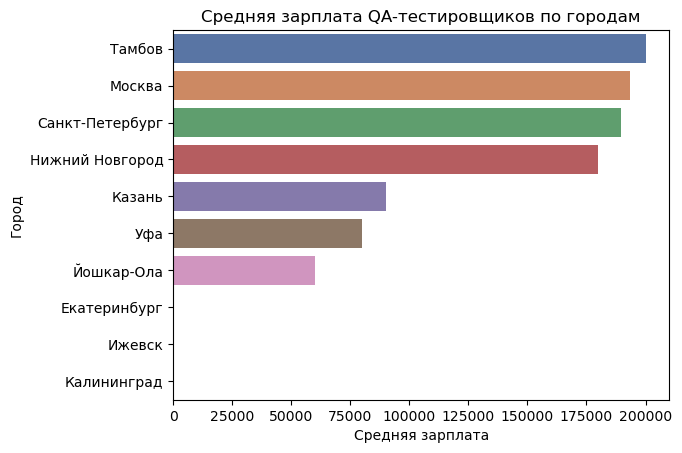

In [28]:
qa_vacancies = qa_vacancies.fillna(0)
sns.barplot(y=qa_vacancies.index, x=qa_vacancies.mean_salary, palette='deep')
plt.xlabel('Средняя зарплата')
plt.ylabel('Город')
plt.title('Средняя зарплата QA-тестировщиков по городам');

#### 5. Напишите функцию для поиска вакансий по переданным в нее значениям заработной платы, наличия тестового задания, наличия заданного текста в наименовании вакансии, наличия заданного навыка. В результате выведите количество найденных вакансий, среднюю заработную плату по найденным вакансиям и список ссылок найденных вакансий. 

In [29]:
def find_vacancy(salary, has_test, title_has, skills):
    found_df = df[df.salary_from > salary]
    found_df = found_df[found_df.has_test == has_test]
    found_df = found_df[found_df['vacancy'].str.contains(title_has)]
    for skill in skills:
        found_df = found_df.dropna(subset=['skills'])
        found_df = found_df[found_df['skills'].str.contains(skill)]
    print(f'Количество найденных вакансий:{found_df.shape[0]}')
    try:
        print(f'Средняя зарплата по найденным вакансиям: {round(found_df.salary_from.mean())}')
    except ValueError:
        print('Средняя зарплата по найденным вакансиям: 0')
    print('Ссылки на вакансии:', *found_df.url, sep='\n')

In [30]:
find_vacancy(100000, False, 'Ведущий', ['Python', 'Git'])

Количество найденных вакансий:7
Средняя зарплата по найденным вакансиям: 177143
Ссылки на вакансии:
https://hh.ru/applicant/vacancy_response?vacancyId=46030221
https://hh.ru/applicant/vacancy_response?vacancyId=46477041
https://hh.ru/applicant/vacancy_response?vacancyId=44397975
https://hh.ru/applicant/vacancy_response?vacancyId=34847485
https://hh.ru/applicant/vacancy_response?vacancyId=36618179
https://hh.ru/applicant/vacancy_response?vacancyId=46390522
https://hh.ru/applicant/vacancy_response?vacancyId=46690447


#### *Необязательно*. Усложненный вариант - сделать атрибуты функции опциональными, чтобы иметь возможность фильтрации вакансий по любой комбинации условий.

In [31]:
def find_vacancy_plus(salary = 0, has_test = None, title_has = '', skills = []):
    found_df = df[df.salary_from > salary]
    if has_test != None:
        found_df = found_df[found_df.has_test == has_test]
    found_df = found_df[found_df['vacancy'].str.contains(title_has)]
    for skill in skills:
        found_df = found_df.dropna(subset=['skills'])
        found_df = found_df[found_df['skills'].str.contains(skill)]
    print(f'Количество найденных вакансий:{found_df.shape[0]}')
    try:
        print(f'Средняя зарплата по найденным вакансиям: {round(found_df.salary_from.mean())}')
    except ValueError:
        print('Средняя зарплата по найденным вакансиям: 0')
    print('Ссылки на вакансии:', *found_df.url, sep='\n')

In [32]:
find_vacancy_plus(title_has = 'Ведущий', skills = ['Python', 'Git'])

Количество найденных вакансий:8
Средняя зарплата по найденным вакансиям: 165000
Ссылки на вакансии:
https://hh.ru/applicant/vacancy_response?vacancyId=46030221
https://hh.ru/applicant/vacancy_response?vacancyId=46477041
https://hh.ru/applicant/vacancy_response?vacancyId=44397975
https://hh.ru/applicant/vacancy_response?vacancyId=34847485
https://hh.ru/applicant/vacancy_response?vacancyId=36618179
https://hh.ru/applicant/vacancy_response?vacancyId=46390522
https://hh.ru/applicant/vacancy_response?vacancyId=46690447
https://hh.ru/applicant/vacancy_response?vacancyId=46532015
